In [1]:
import numpy as np 
import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\parth\Downloads\twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df.shape

(74681, 4)

In [4]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [5]:
df=df.dropna(axis=0)

In [6]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
df = df.drop(['2401','Borderlands'],axis=1)

In [8]:
df

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [9]:
df.rename(columns={"Positive":"Sentiment","im getting on borderlands and i will murder you all ,":"text"},inplace=True)

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [12]:
def clean_text(text):
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub(r"https\S+",'',text)
    text = re.sub(r"\s+",' ',text).strip()
    return text.lower()

In [13]:
df['text'] = df['text'].apply(clean_text)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,ConfusionMatrixDisplay

TfidfVectorizer

In [15]:
tf = TfidfVectorizer(max_features=10000,stop_words="english")
X = tf.fit_transform(df['text']).toarray()
lbl = LabelEncoder()
y = lbl.fit_transform(df['Sentiment'])

In [16]:
x_arr = np.array(X)
y_arr = np.array(y)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_arr,y_arr,test_size=0.2,random_state=0)

Naivebayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

accuracy score : 0.6873


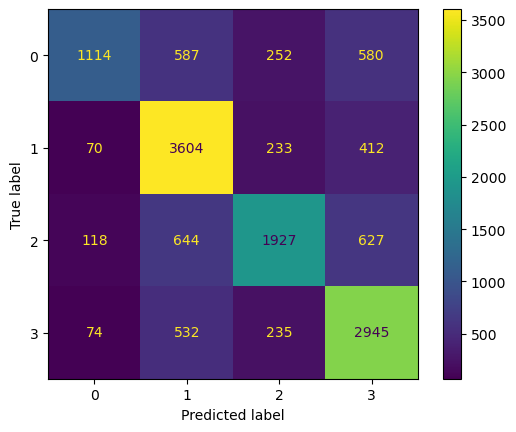

In [19]:
y_pred_nb = nb.predict(x_test)
nb_cnf = confusion_matrix(y_test,y_pred_nb)


print(f"accuracy score : {accuracy_score(y_test,y_pred_nb):.4f}")
ax_nb = ConfusionMatrixDisplay(nb_cnf).plot()
plt.show()

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='saga',max_iter=1000)
lg.fit(x_train,y_train)

In [ ]:
lg.score(x_test,y_test)

DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

In [ ]:
dt.score(x_test,y_test)